In [2]:
import pandas as pd
import yfinance as yf
import pymysql
from sqlalchemy import create_engine

tickers = [
    'SPY',  # 미국 주식
    'IEV',  # 유럽 주식 
    'EWJ',  # 일본 주식
    'EEM',  # 이머징 주식
    'TLT',  # 미국 장기채
    'IEF',  # 미국 중기채
    'IYR',  # 미국 리츠
    'RWX',  # 글로벌 리츠
    'GLD',  # 금
    'DBC'  # 상품
]

all_data = {}
for ticker in tickers:
    all_data[ticker] = yf.download(ticker, start='1993-01-22', progress=False)

prices = pd.DataFrame(
    {tic: data['Adj Close']
     for tic, data in all_data.items()})

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')
prices.to_sql(name='sample_etf', con=engine, index=True, if_exists='replace')
engine.dispose()

# Analysis

In [51]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('mysql+pymysql://root:@127.0.0.1:3306/stock_db')
price = pd.read_sql('select * from sample_etf;', con=engine)
price = price.set_index(['Date'])
engine.dispose()

price.tail()

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
2024-04-29,510.059998,55.139999,67.739998,41.570000,88.669350,91.587723,84.120003,25.180000,216.179993,23.639999
2024-04-30,501.980011,54.349998,67.269997,40.990002,87.912003,91.158997,82.599998,24.770000,211.869995,23.340000
2024-05-01,500.350006,54.119999,67.110001,41.029999,88.559998,91.519997,82.720001,24.840000,213.789993,23.000000
2024-05-02,505.029999,54.740002,68.470001,42.090000,88.940002,91.949997,83.820000,25.530001,213.130005,23.080000
2024-05-03,511.290009,55.220001,69.260002,42.470001,89.839996,92.459999,84.459999,25.670000,212.960007,23.110001


### ALL SPY

In [52]:
import bt

strategy = bt.Strategy("ALL SPY", [
    bt.algos.SelectAll(),
    bt.algos.WeighEqually(),
    bt.algos.RunYearly(),
    bt.algos.Rebalance()
])

data = price[['SPY']]
data = data.loc[(data.index >= '1994') & (data.index < '2024')]

backtest = bt.Backtest(strategy, data)

result = bt.run(backtest)
#result.prices
#result.prices.to_returns()
#result.display()

/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()
/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()


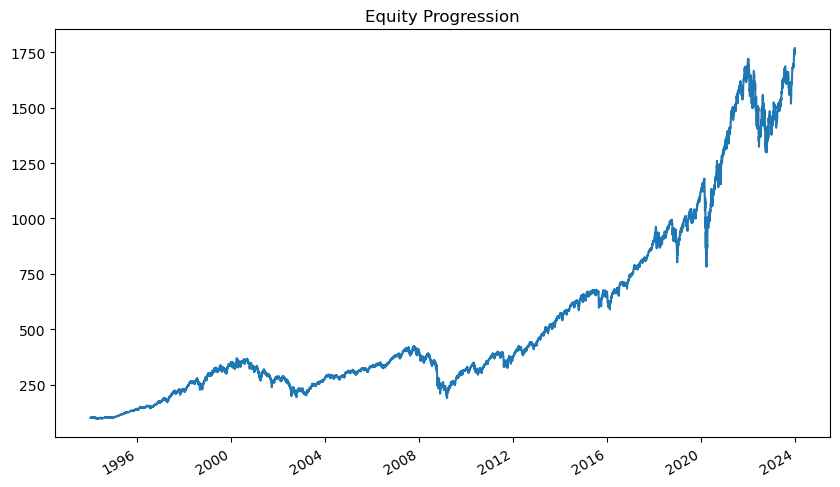

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

result.plot(figsize=(10, 6), legend=False)
plt.show()

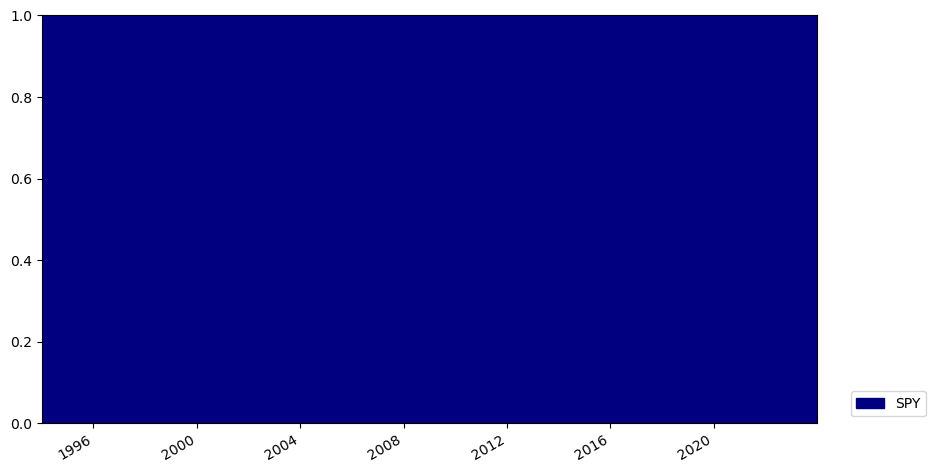

In [54]:
from matplotlib import cm

ax = result.get_security_weights().plot.area(figsize=(10, 6),
                                             ylim=[0, 1],
                                             legend=False,
                                             colormap=cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles),
           reversed(labels),
           loc='lower right',
           bbox_to_anchor=(1.15, 0))
plt.show()

### Asset_EW

In [58]:
import bt

strategy = bt.Strategy("Asset_EW", [
    bt.algos.SelectAll(),
    bt.algos.WeighEqually(),
    bt.algos.RunMonthly(),
    bt.algos.Rebalance()
])

data = price.dropna()

backtest = bt.Backtest(strategy, data)

result = bt.run(backtest)
#result.prices
#result.prices.to_returns()
#result.display()

/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()
/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()


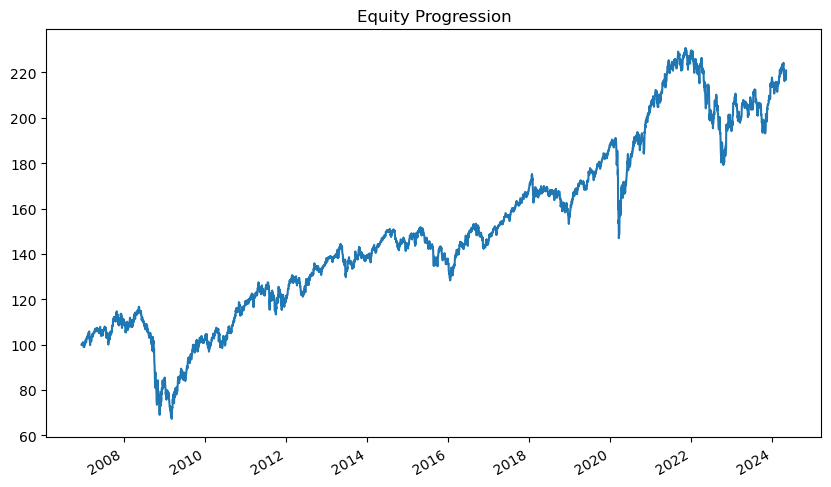

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

result.plot(figsize=(10, 6), legend=False)
plt.show()

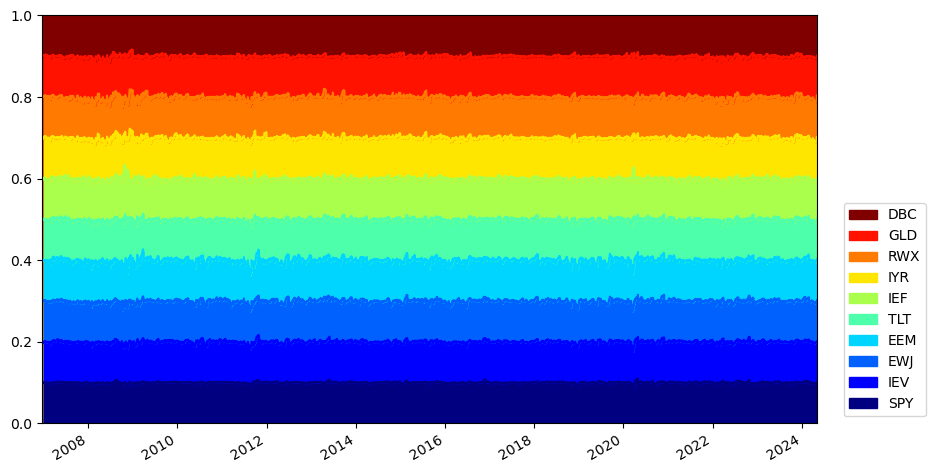

In [60]:
from matplotlib import cm

ax = result.get_security_weights().plot.area(figsize=(10, 6),
                                             ylim=[0, 1],
                                             legend=False,
                                             colormap=cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles),
           reversed(labels),
           loc='lower right',
           bbox_to_anchor=(1.15, 0))
plt.show()

### All Weather

/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()
/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:191: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_prices = obj.resample("M").last()  # .dropna()
/home/jpark/micromamba/envs/quant/lib/python3.12/site-packages/ffn/core.py:193: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.yearly_prices = obj.resample("A").last()  # .dropna()


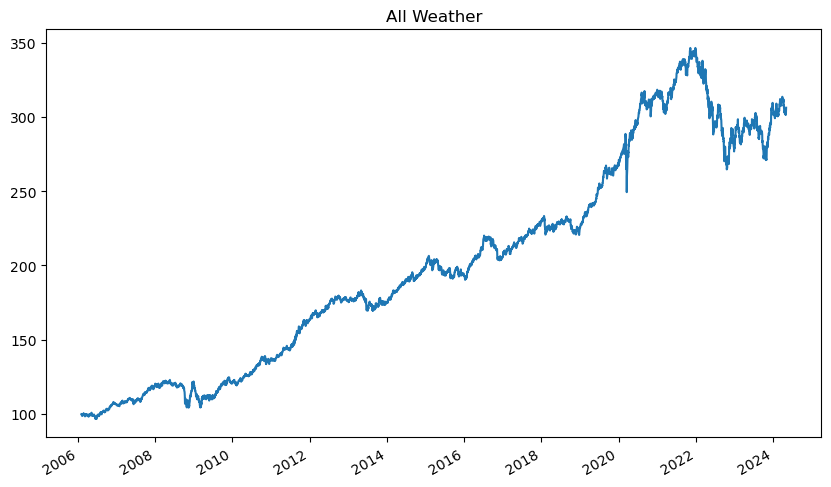

In [61]:
import bt
import matplotlib.pyplot as plt
%matplotlib inline

data = price[['SPY', 'TLT', 'IEF', 'GLD', 'DBC']].dropna()

aw = bt.Strategy('All Weather', [
    bt.algos.SelectAll(),
    bt.algos.WeighSpecified(SPY=0.3, TLT=0.4, IEF=0.15, GLD=0.075, DBC=0.075),
    bt.algos.RunQuarterly(),
    bt.algos.Rebalance()
])
aw_backtest = bt.Backtest(aw, data)
aw_result = bt.run(aw_backtest)

aw_result.plot(figsize=(10, 6), title='All Weather', legend=False)
plt.show()

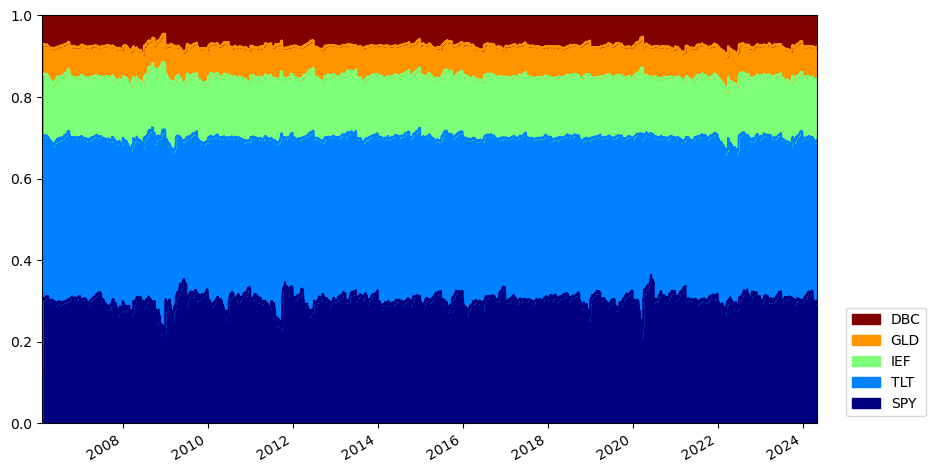

In [62]:
from matplotlib import cm

ax = aw_result.get_security_weights().plot.area(figsize=(10, 6),
                                                ylim=[0, 1],
                                                legend=False,
                                                colormap=cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles),
           reversed(labels),
           loc='lower right',
           bbox_to_anchor=(1.15, 0))
plt.show()

In [64]:
aw_result.stats.loc[['total_return', 'cagr', 'daily_vol', 'max_drawdown', 'calmar', 'daily_sharpe']]

,All Weather
total_return,2.062154
cagr,0.063278
daily_vol,0.081123
max_drawdown,-0.236032
calmar,0.268091
daily_sharpe,0.797726
